In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [2]:
def build_gaussian_filter(size, scale):
  center = np.floor(size / 2)
  kernel = np.zeros((size, size))
  for i in range(size):
      for j in range(size):
          kernel[i, j] = np.exp(-(0.5/(scale**2)) * (np.square(i-center) + 
          np.square(j-center))) / np.sqrt(2*np.pi*scale**2)
  kernel = kernel / np.sum(kernel)
  return kernel

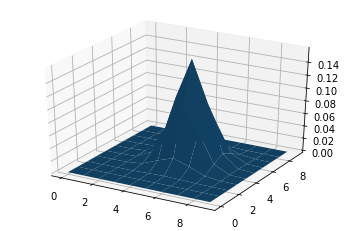

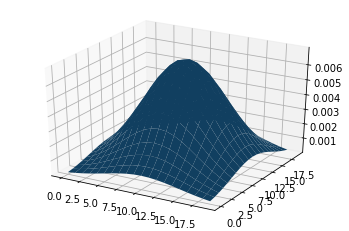

In [67]:
from matplotlib.figure import projections
# plt.figure()

gaussian_filter1 = build_gaussian_filter(10, 1)
shape1 = gaussian_filter1.shape[0]
x, y = np.mgrid[0:shape1, 0:shape1]
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(x,y,gaussian_filter1)

gaussian_filter2 = build_gaussian_filter(20, 5)
shape2 = gaussian_filter2.shape[0]
x2, y2 = np.mgrid[0:shape2, 0:shape2]
fig = plt.figure()
bx = fig.add_subplot(111, projection='3d')
bx.plot_surface(x2,y2,gaussian_filter2)
plt.show()


In [3]:
def convolution(image, kernal):
  padding_size = kernal.shape[0] // 2
  padded_image = np.pad(image, padding_size, mode='constant', constant_values=0)
  destination_image = np.zeros(image.shape)
  kernal_size = kernal.shape[0]
  kernal = np.flip(kernal, axis=0)
  kernal = np.flip(kernal, axis=1)
  for x in range(image.shape[0]):
    for y in range(image.shape[1]):
      temp_matrix = kernal * padded_image[x:x + kernal_size, y:y + kernal_size]
      destination_image[x][y] = np.sum(temp_matrix)  
  return destination_image


In [ ]:
from numpy.core.memmap import ndarray
image = np.array([[0,0,0],
                [0,1,0],
                [0,1,0]])
filter = np.array([[1,2,3],
                [4,5,6],
                [7,8,9]])
# print(convolution(image, filter))

[[ 1.  2.  3.]
 [ 5.  7.  9.]
 [11. 13. 15.]]


In [4]:
def sobel_filter(xy_flag):
  """
  when xy_flag = 0, returns Gx (horizontal)
  when xy_flag = 1, returns Gy (vertical)
  """
  if xy_flag == 0:
    return np.array([
        [-1, 0, 1],
        [-2, 0, 2],
        [-1, 0, 1]]
        )
  elif xy_flag == 1:
    return np.array([
        [-1, -2, -1],
        [0, 0, 0],
        [1, 2, 1]]
        )

In [5]:
def gradient_magnitude(image):
  sobel_x = sobel_filter(0)
  sobel_y = sobel_filter(1)
  g_x = convolution(image, sobel_x)
  g_y = convolution(image, sobel_y)
  # print(np.sqrt(np.power(g_x, 2) + np.power(g_y, 2)))
  return np.sqrt(np.power(g_x, 2) + np.power(g_y, 2))

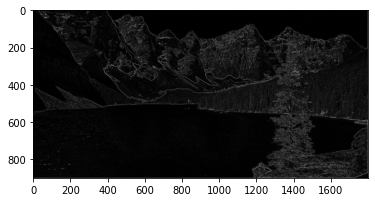

In [71]:
img1 = cv2.imread('/content/drive/MyDrive/image2.jpg')
img1_gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
plt.imshow(gradient_magnitude(img1_gray), cmap = 'gray')
# plt.imshow(img1_color)


In [13]:
def threshold_algorithm(image, eps=0.001):
  g_image = gradient_magnitude(image)
  t = -1
  t_0 = np.mean(g_image)
  index = 0
  while index < 100:
    lower_class = g_image[g_image <= t_0]
    upper_class = g_image[g_image > t_0]
    m_L = lower_class.mean()
    m_H = upper_class.mean()
    t_i = (m_L + m_H) / 2
    # print(t_0, t_i)
    if abs(t_0 - t_i) <= eps:
      t = t_i
      break
    else:
      t_0 = t_i
    index += 1
  edge_mapped_image = np.zeros(image.shape)
  # edge_mapped_image[g_image >= t] = 255
  for x in range(g_image.shape[0]):
    for y in range(g_image.shape[1]):
      if g_image[x][y] > t:
        edge_mapped_image[x][y] = 255
  return edge_mapped_image


[[ 95.13148795  83.00602388  84.         ... 528.         527.00094877
  560.03571315]
 [ 90.60905032  22.          24.08318916 ...   4.           4.47213595
  529.00850655]
 [ 84.02380615   2.           7.21110255 ...   4.           5.09901951
  529.02362896]
 ...
 [447.32314941  28.46049894  32.984845   ...   2.82842712   1.41421356
    2.        ]
 [460.3520392   29.01723626  41.01219331 ...   2.82842712   2.82842712
    1.41421356]
 [490.76470941 458.01746692 458.06986367 ...   3.16227766   1.41421356
    0.        ]]
0
50.1094579872833 74.81009986873688
1
74.81009986873688 90.78048130454
2
90.78048130454 100.89757322696124
3
100.89757322696124 107.26120299322405
4
107.26120299322405 111.18065340771415
5
111.18065340771415 113.59274500020754
6
113.59274500020754 115.05125594338026
7
115.05125594338026 115.93496913519151
8
115.93496913519151 116.41739125058737
9
116.41739125058737 116.7944477257204
10
116.7944477257204 116.99553965762935
11
116.99553965762935 117.07300421242827
12
1

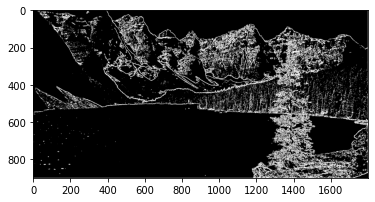

In [22]:
plt.imshow(threshold_algorithm(img1_gray), cmap = 'gray')
# threshold_algorithm(img1_gray)

In [19]:
def plot(image_path):
  fig = plt.figure(figsize=(15,15))
  ax1 = fig.add_subplot(221)
  ax2 = fig.add_subplot(222)
  ax3 = fig.add_subplot(223)
  ax4 = fig.add_subplot(224)
  img = cv2.imread(image_path)
  img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  gaussian_filter = build_gaussian_filter(7, 2)
  img_blur = convolution(img_gray, gaussian_filter)
  img_gradient_magnitude = gradient_magnitude(img_blur)
  img_edge_detector = threshold_algorithm(img_gradient_magnitude)

  ax1.imshow(img_gray, cmap = 'gray')
  ax1.title.set_text('Original'), ax1.set_xticks([]), ax1.set_yticks([])

  ax2.imshow(img_blur, cmap = 'gray')
  ax2.title.set_text('Gaussian'), ax2.set_xticks([]), ax2.set_yticks([])

  ax3.imshow(img_gradient_magnitude, cmap = 'gray')
  ax3.title.set_text('Gradient Magnitude'), ax3.set_xticks([]), ax3.set_yticks([])

  ax4.imshow(img_edge_detector, cmap = 'gray')
  ax4.title.set_text('Edge Detector'), ax4.set_xticks([]), ax4.set_yticks([])



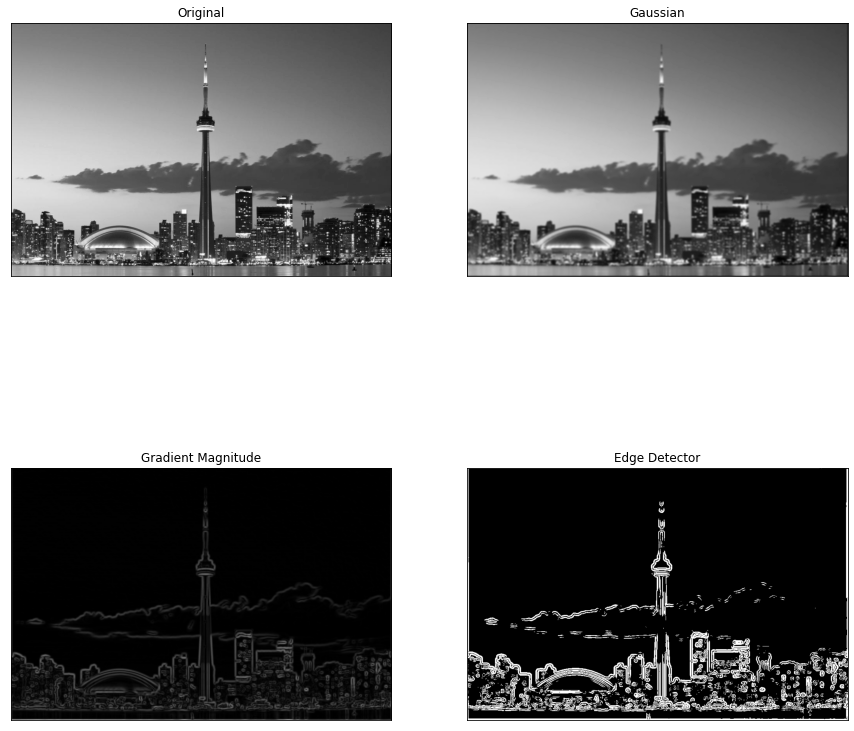

In [20]:
plot('/content/drive/MyDrive/image1.jpg')

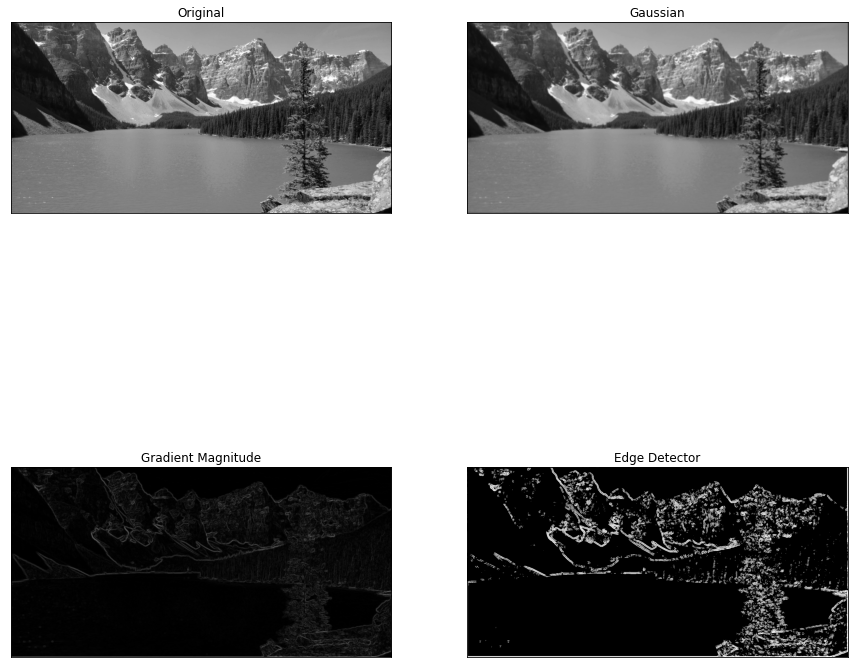

In [21]:
plot('/content/drive/MyDrive/image2.jpg')

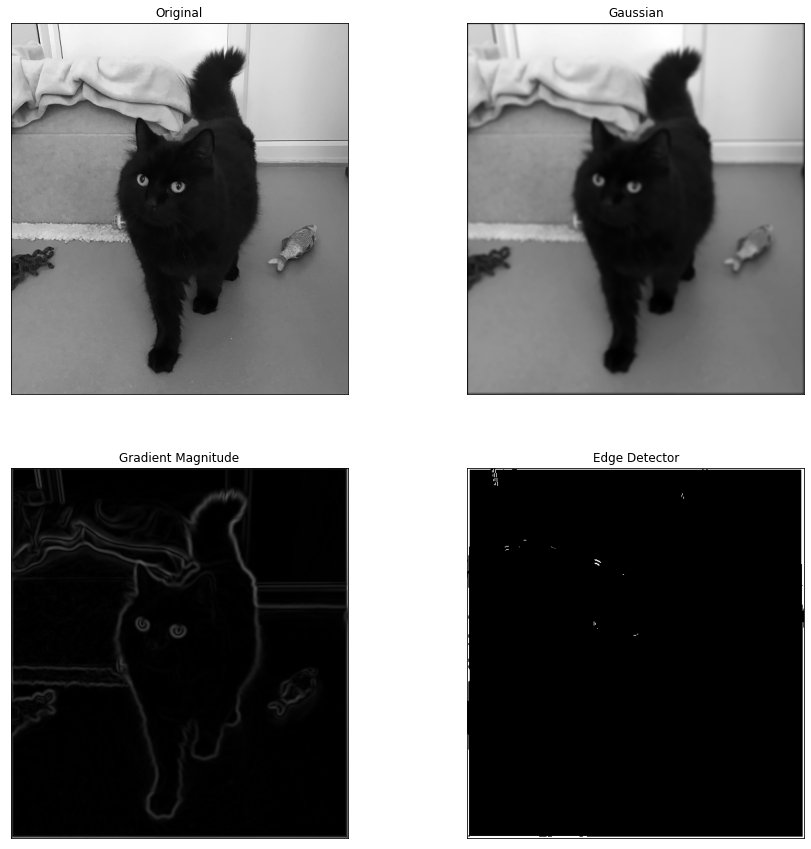

In [22]:
plot('/content/drive/MyDrive/cat_black.jpeg')